# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz
import dtreeviz
import warnings
warnings.filterwarnings('ignore')

In [3]:
URL = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(URL)

x = df.drop(columns = ['medv']).copy()
y = df[['medv']]

In [4]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [7]:
df.corr().tail(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
medv,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


Aparentemente a variavel "rm" (número médio de quartos por habitação) apresenta um potencial preditivo com um alto valor comparado as demais variaveis. Outra variavel com valor elevado em comparação com as demais é "lstat" (% menor status da população), mas essa possui o valor negativo.

### 3. Separe os dados em validação e teste

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2402)

print('X_train:', x_train.shape)
print('X_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)
y_train: (379, 1)
y_test: (127, 1)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [9]:
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(x_train, y_train)
tree_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2402)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [10]:
mse_1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(x_train))
mse_1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(x_test))

mse_2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(x_train))
mse_2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(x_test))

temp_1 = 'O MSE da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(temp_1.format(tree_1.get_depth(), 'treino', mse_1_train).replace('.',','))
print(temp_1.format(tree_1.get_depth(), 'teste', mse_1_test).replace('.',',') + '\n')

print(temp_1.format(tree_2.get_depth(), 'treino', mse_2_train).replace('.',','))
print(temp_1.format(tree_2.get_depth(), 'teste', mse_2_test).replace('.',','))

O MSE da árvore com profundidade = 8 para a base de treino é: 1,84
O MSE da árvore com profundidade = 8 para a base de teste é: 12,65

O MSE da árvore com profundidade = 2 para a base de treino é: 27,11
O MSE da árvore com profundidade = 2 para a base de teste é: 21,70


In [11]:
r2_1_train = tree_1.score(X=x_train, y=y_train)
r2_1_test = tree_1.score(X=x_test, y=y_test)

r2_2_train = tree_2.score(X=x_train, y=y_train)
r2_2_test = tree_2.score(X=x_test, y=y_test)

temp_2 = 'O (R-Quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(temp_2.format(tree_1.get_depth(), 'treino', r2_1_train).replace('.',','))
print(temp_2.format(tree_1.get_depth(), 'treino', r2_1_test).replace('.',',') +'\n')

print(temp_2.format(tree_2.get_depth(), 'treino', r2_2_train).replace('.',','))
print(temp_2.format(tree_2.get_depth(), 'treino', r2_2_test).replace('.',','))

O (R-Quadrado) da árvore com profundidade = 8 para a base de treino é: 0,98
O (R-Quadrado) da árvore com profundidade = 8 para a base de treino é: 0,85

O (R-Quadrado) da árvore com profundidade = 2 para a base de treino é: 0,68
O (R-Quadrado) da árvore com profundidade = 2 para a base de treino é: 0,74


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [12]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2402)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

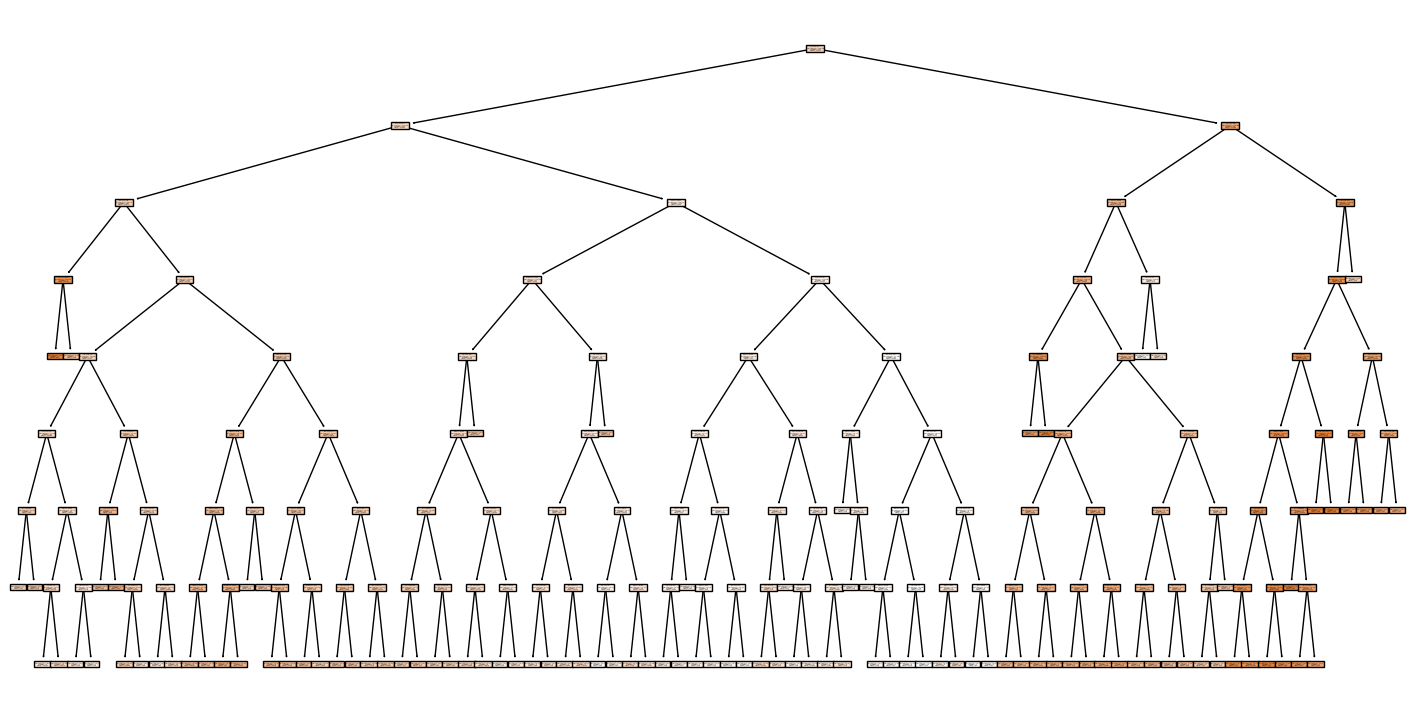

In [13]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=tree_1, 
                    feature_names=x.columns, 
                    filled=True)

In [14]:
text_tree = tree.export_text(decision_tree=tree_1)

print(text_tree)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_5 <= 4.41
|   |   |   |   |   |   |--- feature_11 <= 243.06
|   |   |   |   |   |   |   |--- value: [23.10]
|   |   |   |   |   |   |--- feature_11 >  243.06
|   |   |   |   |   |   |   |--- value: [27.50]
|   |   |   |   |   |--- feature_5 >  4.41
|   |   |   |   |   |   |--- feature_6 <= 98.65
|   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |--- value: [20.31]
|   |   |   |   |   |   |--- feature_6 >  98.65
|   |   |   |   |   |   |   |--- feature_5 <= 5.91
|   |   |   |   |   |   |   |  

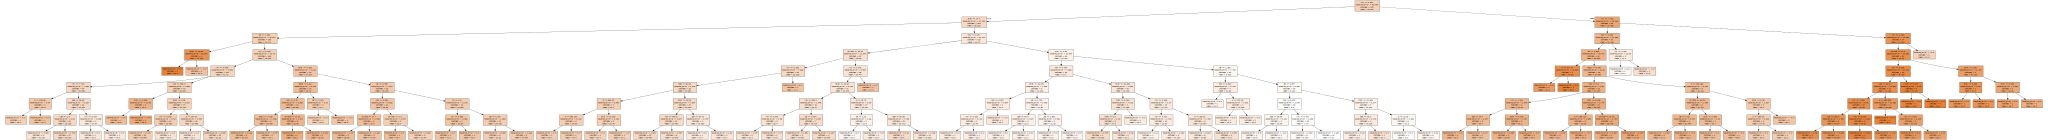

In [15]:
dd = tree.export_graphviz(decision_tree=tree_1, 
                                out_file=None, 
                                feature_names=x.columns, 
                                filled=True)

graphviz.Source(dd, format='png')

In [17]:
y_train = y.to_numpy() if isinstance(y, pd.DataFrame) else y

dtreeviz.model(model=tree_1, 
               X_train=x, 
               y_train=y_train, 
               target_name='target', 
               feature_names=x.columns
              ).view()


A variável que parece ser mais importante é a da primeira "quebra" da árvore, RM, que representa o número médio de quartos por habitação, possivelmente com o menor Erro Quadrático Médio (EQM) entre todas as variáveis.